In [1]:
from matplotlib import pyplot as plt 
import numpy as np
from scipy.special import erf
%matplotlib inline

In [2]:
import sys
sys.path.append('../lib')
from simlib import *

In [3]:
def gen_int(x, m, s):
    return s*erf((x-m)/(np.sqrt(2)*s))/(2*np.abs(s))

def integral(x1, x2, m1, s1, m2, s2):
    return 0.5 * (gen_int(x2, m1, s1) - gen_int(x1, m1, s1) + gen_int(x2, m2, s2) - gen_int(x1, m2, s2))

In [4]:
method = 'smol'
m1, s1 = -3.0, 1.0
m2, s2 = +3.0, 1.0
ks = []

100%|██████████| 14999/14999 [11:09<00:00, 22.40it/s]


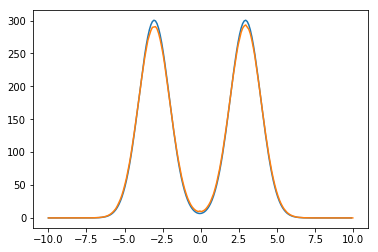

In [5]:
num_particles = 1100
g1 = gaussian(-3)
g2 = gaussian(+3)
U = gaussian_potential([g1, g2])
max_t = 1500
dt = 0.1

ts, xs = simulate(U, method=method, num_particles=num_particles, max_t=max_t, x0=0, D=1.0)

num_bins = 200
bins = np.linspace(-10, 10, num_bins)
hists = np.zeros(shape=(num_particles, num_bins))
hists = [np.histogram(xs[:,i], bins)[0] for i in range(num_particles)]
hists = np.array(hists)
mean_hists = np.zeros(shape=num_bins)
for i, _ in enumerate(bins[:-1]):
    mean_hists[i] = np.mean(hists[:,i])

N = max_t/dt
expected = N * np.array([integral(bins[i], bins[i+1], m1, s1, m2, s2) for i, _ in enumerate(bins[:-1])])

plt.plot(bins[:-1], expected)
plt.plot(bins, mean_hists)

k = [0 if (e-np.sqrt(e) <= h <= e+np.sqrt(e)) else 1 for h, e in zip(mean_hists, expected)]
ks.append(k)

In [9]:
N = max_t/dt
expected = N * np.array([integral(bins[i], bins[i+1], m1, s1, m2, s2) for i, _ in enumerate(bins[:-1])])

In [11]:
k = [0 if (e-np.sqrt(e) <= h <= e+np.sqrt(e)) else 1 for h, e in zip(mean_hists, expected)]
np.sum(k)

3